In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('ushape.csv')

In [4]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [14]:
df.columns

Index(['3.159499363321345566e-02', '9.869877579082642072e-01',
       '0.000000000000000000e+00'],
      dtype='object')

In [15]:
df.rename(columns={'3.159499363321345566e-02': 'X', '9.869877579082642072e-01': 'y', '0.000000000000000000e+00': 'class'}, inplace=True)

In [16]:
df.columns

Index(['X', 'y', 'class'], dtype='object')

In [17]:
df.head()

,X,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [22]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

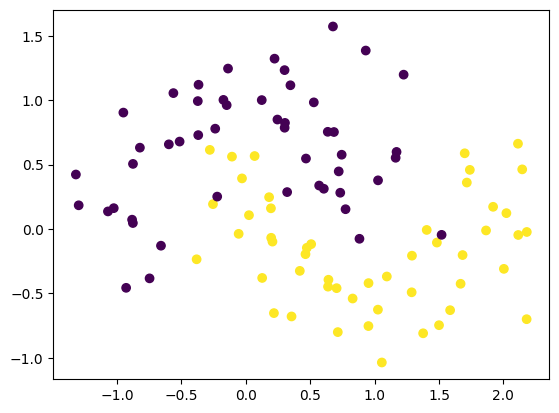

In [24]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

lor.fit(X,y)

LogisticRegression()

<Axes: >

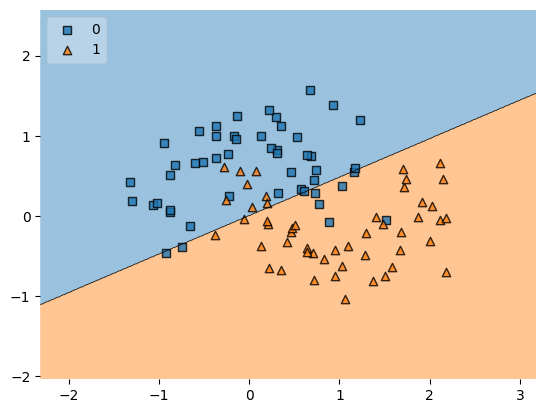

In [30]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y.astype('int'), lor, legend=2)

In [33]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lor, X,y, scoring='accuracy', cv=10))

np.float64(0.8300000000000001)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_trf = poly.fit_transform(X)

In [35]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1, X_trf, y, scoring='accuracy', cv=10))

np.float64(0.9099999999999999)

In [41]:
def plot_decision_boundary(X,y, degree=1):
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf, y)

    accuracy = np.mean(cross_val_score(clf, X_trf,y,scoring='accuracy', cv=10))
    a = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)
    
    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

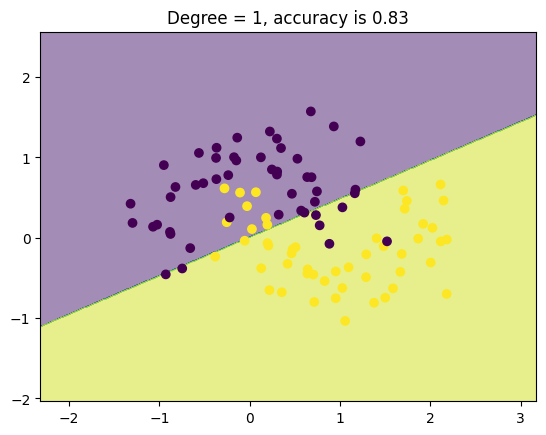

In [42]:
plot_decision_boundary(X,y)

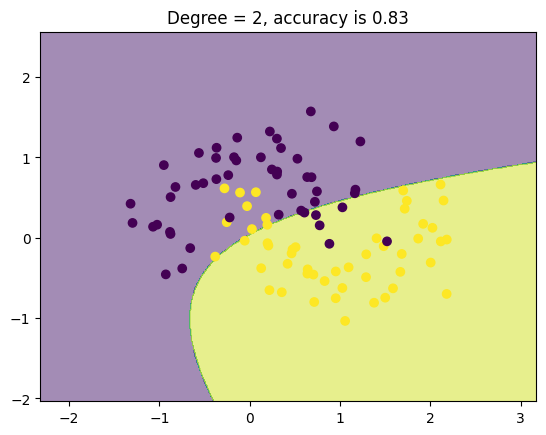

In [43]:
plot_decision_boundary(X,y,degree=2)

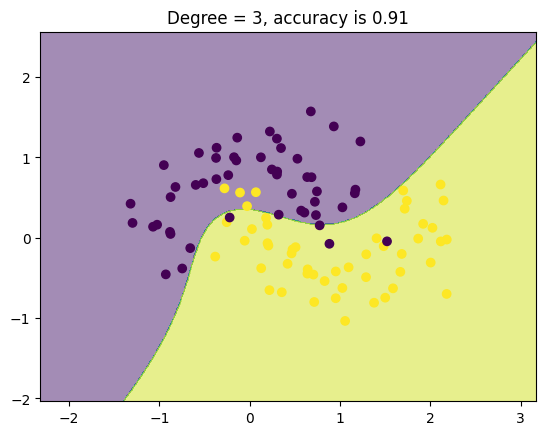

In [44]:
plot_decision_boundary(X,y, degree=3)

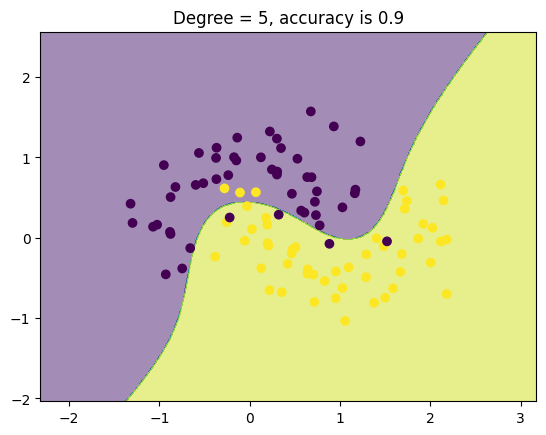

In [45]:
plot_decision_boundary(X,y,degree=5)

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

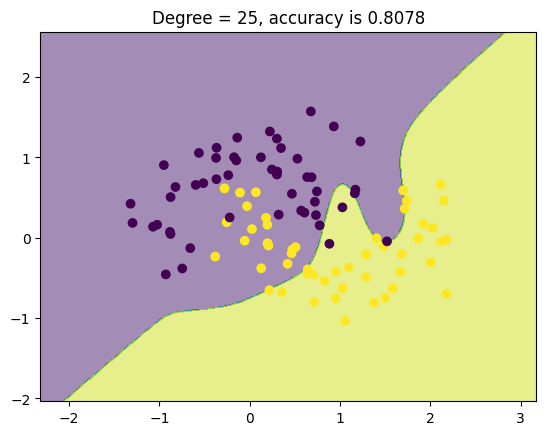

In [46]:
plot_decision_boundary(X,y, degree=25)